# ***Transfer Learning***

---

---





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install keras

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install tensorflow

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


# ***Import Libraries***

---

---





In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing import image
from keras.models import load_model

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

import warnings
warnings.filterwarnings('ignore')

# **Load the pretrained Network**

In [2]:
model_vgg16_conv = VGG19(weights='imagenet', include_top=False)

# ***Freeze the layers***

---

---





In [3]:
for layer in model_vgg16_conv.layers:
    layer.trainable = False

# ***Training parameters***

---

---





In [11]:
img_width, img_height = 224, 224
train_data_dir = 'C:/Users/Nethaji Achha/Desktop/New folder/train'
val_data_dir = 'C:/Users/Nethaji Achha/Desktop/New folder/test'
model_weights_file = 'main_Model.h5'
nb_epochs = 5

# ***Build a classification model on top of Base Network***

---

---





In [16]:
input = Input(shape=(img_width, img_height, 3))
output_vgg16_conv = model_vgg16_conv(input)
x = Flatten()(output_vgg16_conv)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(4, activation='softmax')(x)
model = Model(inputs=input, outputs=x)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1605696   
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 4)                 1028

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ***Dataset Preparation***

---

---





In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=1, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                        batch_size=1,class_mode='categorical')

Found 20767 images belonging to 4 classes.
Found 3502 images belonging to 4 classes.


# ***Training***

---

---





In [19]:
callbacks = keras.callbacks.ModelCheckpoint("main_Model.h5",save_best_only=True)
history = model.fit_generator( train_generator, callbacks = callbacks, epochs=nb_epochs, validation_data=validation_generator)

print('Training Completed!')

Epoch 1/5
20767/20767 [==============================] - 2312s 111ms/step - loss: 0.6987 - accuracy: 0.8560 - val_loss: 0.5284 - val_accuracy: 0.8898
Epoch 2/5
20767/20767 [==============================] - 2257s 109ms/step - loss: 0.5674 - accuracy: 0.9077 - val_loss: 0.9400 - val_accuracy: 0.8772
Epoch 3/5
20767/20767 [==============================] - 2291s 110ms/step - loss: 0.5368 - accuracy: 0.9167 - val_loss: 1.6642 - val_accuracy: 0.9203
Epoch 4/5
20767/20767 [==============================] - 2276s 110ms/step - loss: 0.4972 - accuracy: 0.9215 - val_loss: 2.1509 - val_accuracy: 0.8701
Epoch 5/5
20767/20767 [==============================] - 2268s 109ms/step - loss: 0.5253 - accuracy: 0.9269 - val_loss: 0.7721 - val_accuracy: 0.9149
Training Completed!


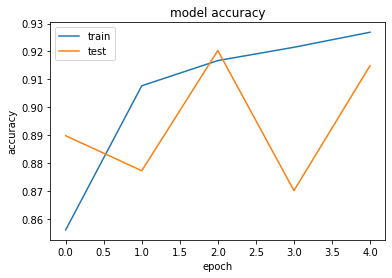

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

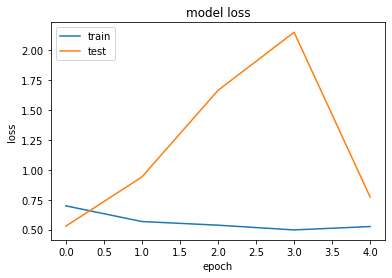

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ***Test the model***

---

---





In [29]:
img_path = './test/insects/12253252_ba27b811f0_n.jpg'
label = ['animal','bird','insects','snakes']
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

Predicted Array: [[0 0 1 0]]
Predicted Label: insects


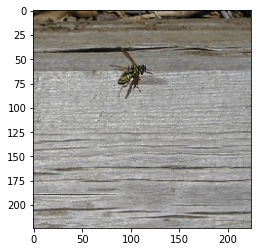

In [30]:
imgplot = plt.imshow(img)
plt.show()

# ***Saved Model Deployment***

---

---





In [31]:
model = load_model('./main_Model.h5')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1605696   
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 4)                 1028

In [38]:
img_path = "./test/insects/150867296_b586fa3e0f_n.jpg"
label = ['animal','bird','insects','snakes']
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

Predicted Array: [[0 0 1 0]]
Predicted Label: insects


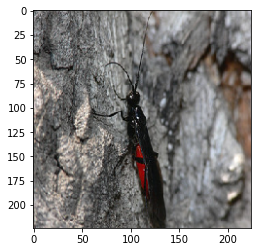

In [39]:
imgplot = plt.imshow(img)
plt.show()

# ***Models for image classification with weights trained on ImageNet***
# ***Xception***
# ***VGG16***
# ***VGG19***
# ***ResNet50***
# ***InceptionV3***
# ***InceptionResNetV2***
# ***MobileNet***
# ***DenseNet***
# ***NASNet ***

---

---



